# Kernels and Servers

The most straight-forward method of accessing a Jupyter notebook server on NREL HPC is to direct your browser to our [JupyterHub instance "Europa"](europa.hpc.nrel.gov).
However, an important caveat is that the Jupyter installation on this node is tethered to its base Anaconda environment. What this means if you do not have privileges to install modules to this python environment.

There are a few methods of accessing modules you've installed in other python/conda environments within Jupyter. The primary means of doing this is to create what are known as "**kernels**". An alternative approach is to add an installation of Jupyter to your conda environment and run your own server, which will use the modules from that environment.

## Kernels
In order to add jupyter kernels you will need to install the `ipykernel` module to the environment from which you would like the kernel to load form:

In [3]:
!conda create --yes --use-local --name jupyter_env python=3 ipykernel

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/mbartlet/.conda/envs/jupyter_env

  added / updated specs:
    - ipykernel
    - python=3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py38_0         148 KB  conda-forge
    ipykernel-5.1.3            |   py38h5ca1d4c_0         160 KB  conda-forge
    ipython-7.10.1             |   py38h5ca1d4c_0         1.1 MB  conda-forge
    jedi-0.15.1                |           py38_0         718 KB  conda-forge
    jupyter_client-5.3.3       |           py38_1         132 KB  conda-forge
    jupyter_core-4.6.1         |           py38_0          70 KB  conda-forge
    ld_impl_linux-64-2.33.1    |    

In [5]:
!jupyter kernelspec list

Available kernels:
  python3    /opt/jupyter/anaconda3/share/jupyter/kernels/python3


In [8]:
!python -m ipykernel install --user --name "my-kernel" --display-name "My Kernel"

Installed kernelspec my-kernel in /home/mbartlet/.local/share/jupyter/kernels/my-kernel


You should now see your new kernel in the list

In [9]:
!jupyter kernelspec list

Available kernels:
  my-kernel    /home/mbartlet/.local/share/jupyter/kernels/my-kernel
  python3      /opt/jupyter/anaconda3/share/jupyter/kernels/python3


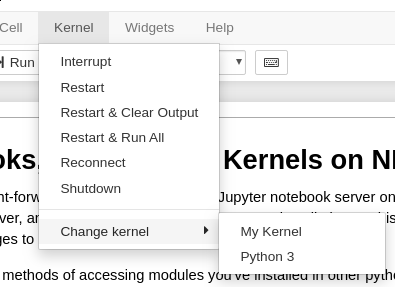

Now you should be able to click the "Kernel" dropdown in the menu-bar at the top and select your newly created kernel, which will use the modules you added to the associated environment:

## Local Jupyter Install

In [13]:
!conda create --yes --use-local --name jupyter_env python=3 jupyter

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/mbartlet/.conda/envs/jupyter_env

  added / updated specs:
    - jupyter
    - python=3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    dbus-1.13.6                |       he372182_0         602 KB  conda-forge
    entrypoints-0.3            |        py38_1000          12 KB  conda-forge
    expat-2.2.5                |    he1b5a44_1004         191 KB  conda-forge
    fontconfig-2.13.1          |    h86ecdb6_1001         340 KB  conda-forge
    gettext-0.19.8.1           |    hc5be6a0_1002         3.6 MB  conda-forge
    glib-2.58.3                |py38h6f030ca_1002         3.3 MB  conda-forge
    gst-plugins-base-1.14.5    |      

Now you should have a jupyter executable in your environment directory:

In [15]:
%%bash -l
module load conda
. activate jupyter_env
which jupyter

/home/mbartlet/.conda/envs/jupyter_env/bin/jupyter


Now to start your own Jupyter server, try the following:
```bash
module load conda
. activate jupyter_env
jupyter notebook --ip=0.0.0.0 --port=8892 --no-browser
# --no-browser prevent jupyter from trying to launch a browser on the remote machine
# --ip=0.0.0.0 allows clients to access the server from any hostname
```

And to access the server you are running on NREL HPC, you will need to do what is called SSH tunneling:
```bash
my_port=8000
remote_port="localhost:8892"
ssh -L $my_port:$remote_port el2.hpc.nrel.gov  # Be sure you ssh to the same node where you started jupyter
```

You can also run a jupyter server as a SLURM job which then has access to any of the resources you requested. Here is some relevant resources by a fellow NRELian for using python to coordinate SLURM tasks:
https://github.nrel.gov/nmerket/notebook-dask-on-eagle